# Create a custom stationary covariance model

This use case illustrates how the user can define his own stationary covariance model thanks to the object *UserDefinedStationaryCovarianceModel* defined from:

- a mesh $\mathcal{M}$ of dimension $n$ defined by the vertices $(\underline{\tau}_0,\dots, \underline{\tau}_{N-1})$ and the associated simplices,
- a collection of covariance matrices stored in the object *CovarianceMatrixCollection* noted $\underline{\underline{C}}_0, \dots, \underline{\underline{C}}_{N-1}$ where $\underline{\underline{C}}_k$ $\in \mathcal{M}_{d \times d}(\mathbb{R})$ for $0 \leq k \leq N-1$

Then we build a stationary covariance function which is a piecewise constant function on $\mathcal{D}$ defined by:

$$\forall \underline{\tau} \in \mathcal{D}, \, C^{stat}(\underline{\tau}) =  \underline{\underline{C}}_k$$

where $k$  is such that $\underline{\tau}_k$ is the  vertex of $\mathcal{M}$ the nearest to $\underline{t}.$

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# We detail the example described in the documentation
# Create the time grid
t0 = 0.0
dt = 0.5
N = int((20.0 - t0) / dt)
mesh = ot.RegularGrid(t0, dt, N)

# Create the covariance function


def gamma(tau):
    return 1.0 / (1.0 + tau * tau)

# Create the collection of HermitianMatrix
coll = ot.CovarianceMatrixCollection()
for k in range(N):
    t = mesh.getValue(k)
    matrix = ot.CovarianceMatrix([[gamma(t)]])
    coll.add(matrix)

In [6]:
# Create the covariance model
covmodel = ot.UserDefinedStationaryCovarianceModel(mesh, coll)

# One vertex of the mesh
tau = 1.5

# Get the covariance function computed at the vertex tau
covmodel(tau)

class=CovarianceMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.307692]

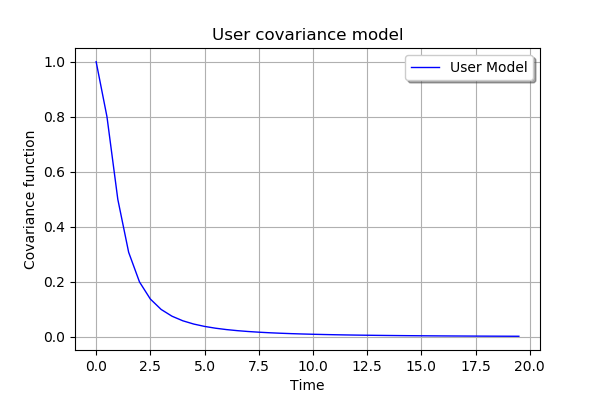

In [7]:
# Graph of the spectral function
x = ot.Sample(N, 2)
for k in range(N):
    t = mesh.getValue(k)
    x[k, 0] = t
    value = covmodel(t)
    x[k, 1] = value[0, 0]

# Create the curve of the spectral function
curve = ot.Curve(x, 'User Model')

# Create the graph
myGraph = ot.Graph('User covariance model', 'Time', 'Covariance function', True)
myGraph.add(curve)
myGraph.setLegendPosition('topright')
myGraph